In [2]:
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
import numpy as np

In [3]:
# load behavioral data
subj01 = pd.read_csv("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/behav/responses.tsv",sep="\t")
subj01.head()

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1,0,1.0,0
1,1,1,1,2,61883,5013,0.505128,0,1.0,972.261383,0.0,NaN,NaN,0,1.0,1,0,1.0,0
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1,0,1.0,0
3,1,1,1,4,67574,8823,0.505221,0,1.0,747.518479,0.0,NaN,NaN,0,1.0,1,0,1.0,0
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1,0,1.0,0


In [4]:
# loading MNI space data
beta_ss1 = nib.load("/home/jovyan/shared/NSD/nsddata_betas/ppdata/subj01/MNI/betas_fithrf/betas_session01.nii.gz")
brainmask = nib.load("/home/jovyan/shared/NSD/nsddata_betas/ppdata/subj01/MNI/betas_fithrf/valid_session01.nii.gz")
mask = brainmask.get_fdata()

MTLmask = nib.load("/home/jovyan/lh.MTL.nii.gz")
MTL = MTLmask.get_fdata()

anat_T1 = nib.load("./T1_to_MNI.nii.gz") # loading from the current directory
anat_data = anat_T1.get_fdata()

In [8]:
data = beta_ss1.slicer[:, :, :, 0].get_fdata()/300 # extract the first trial of this session's beta map
data_brainmasked = np.multiply(mask,data)

In [9]:
print("brainmask dimension:",mask.shape)
print(data_brainmasked.shape)
print(MTL.shape)

brainmask dimension: (182, 218, 182)
(182, 218, 182)
(320, 320, 320)
74556.0
2676916.0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [27]:
data_masked.shape

(182, 218, 182)

In [19]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

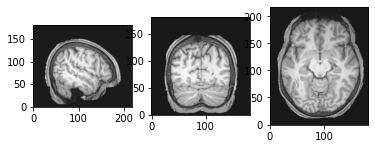

In [20]:
# A quick look of the anatomical: load the T1_MNI of subject 01
show_slices([anat_data[40, :, :],
             anat_data[:, 50, :],
             anat_data[:, :, 60]])

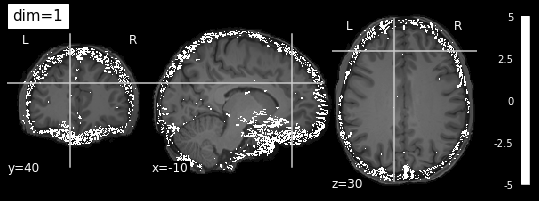

In [28]:
# Overlay single trial's beta with the participant's T1 in MNI
plotting.plot_stat_map(nib.Nifti1Image(data_masked, beta_ss1.affine), # this function needs a 3D data file
                       bg_img="/home/jovyan/T1_to_MNI.nii.gz", # the anatomical background
                       cut_coords=(-10, 40, 30), 
                       threshold=5, title="dim=1",
                       dim=1,vmax=5)

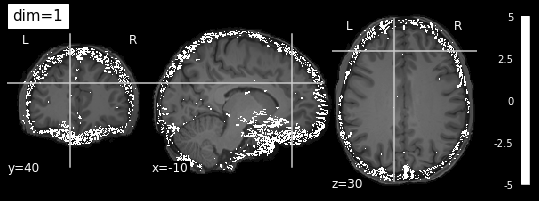

In [29]:
# Overlay single trial's beta with the participant's T1 in MNI
plotting.plot_stat_map(nib.Nifti1Image(data, beta_ss1.affine), # this function needs a 3D data file
                       bg_img="/home/jovyan/T1_to_MNI.nii.gz", # the anatomical background
                       cut_coords=(-10, 40, 30), 
                       threshold=5, title="dim=1",
                       dim=1,vmax=5)

In [44]:
# 1mm space
brainmask = nib.load("/home/jovyan/brainmask (1).nii.gz")
mask = brainmask.get_fdata()
print(mask.shape)


(145, 186, 148)


In [66]:
# 1.8mm space
beta_1pt8mm = nib.load("/home/jovyan/betas_session01.nii.gz")
beta_t1 = beta_1pt8mm.slicer[:,:,:,0].get_fdata()

In [67]:
beta_t1.shape

(81, 104, 83)

In [47]:
# 1.8 mm MTL mask
MTL= nib.load("/home/jovyan/MTL.nii")
mask = MTL.get_fdata()
mask.shape

(81, 104, 83)

In [48]:
print(np.unique(mask))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [73]:
mask_cor = np.where(mask==1)
mask_r1 = beta_t1[mask_cor[0],mask_cor[1],mask_cor[2]]

In [76]:
mask_r1.shape

(102,)

In [78]:
len(mask_cor[1])

102

In [79]:
mask_r1

array([ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00, -3.510e+02,
        0.000e+00,  0.000e+00,  0.000e+00,  5.248e+03,  0.000e+00,
        0.000e+00, -1.000e+00,  0.000e+00, -1.960e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
       -2.780e+02, -1.030e+02,  0.000e+00, -2.820e+02,  9.130e+02,
       -9.200e+01,  0.000e+00, -4.600e+02,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
       -1.180e+02,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00, -3.560e+02,  1.160e+02,  8.300e+01,  0.000e+00,
        0.000e+00,  0.000e+00,  1.066e+03, -7.000e+00,  4.030e+02,
        2.230e+03, -2.555e+03, -1.924e+03,  0.000e+00,  0.000e+00,
        3.270e+02,  2.480e+02, -2.360e+02,  1.130e+02,  0.000e+00,
       -1.900e+01, -5.270e+02,  1.840e+02, -1.600e+02, -7.540e